In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [292]:
df = pd.read_csv("EmployeeData.csv")
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [293]:
df.shape

(54808, 14)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [295]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [296]:
df.index

RangeIndex(start=0, stop=54808, step=1)

In [297]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [298]:
cols = ['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met', 'awards_won',
       'avg_training_score', 'is_promoted']
df.columns = cols

In [299]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [300]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met                   0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [301]:
df['education'].isna().sum()

2409

In [302]:
cplt = df[df['education'].isna()].is_promoted.value_counts()

In [303]:
depts = df.department.unique()
depts

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [304]:
for dept in depts:
    edu = df[df.department == dept].education.mode()[0]
    print(dept," : ",edu)

Sales & Marketing  :  Bachelor's
Operations  :  Bachelor's
Technology  :  Bachelor's
Analytics  :  Bachelor's
R&D  :  Bachelor's
Procurement  :  Bachelor's
Finance  :  Bachelor's
HR  :  Bachelor's
Legal  :  Bachelor's


In [305]:
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [306]:
df['education'].isna().sum()

0

In [307]:
df.previous_year_rating.value_counts(dropna=False)

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: previous_year_rating, dtype: int64

In [308]:
#Check no. of new joiners
freshers = df[df.length_of_service == 1]
print(len(freshers))

4547


In [309]:
#How many didn't have rating
freshers['previous_year_rating'].isnull().sum()

4124

In [310]:
#Check how many of them have promoted
freshers[freshers['is_promoted'] == 1].previous_year_rating.isnull().sum()

339

In [311]:
avg_rate = df['previous_year_rating'].mode()[0]
avg_rate

3.0

In [312]:
df['previous_year_rating'].fillna(avg_rate, inplace=True)

In [313]:
df['previous_year_rating'].isna().sum()

0

In [314]:
df.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met                    2
awards_won                  2
avg_training_score         61
is_promoted                 2
dtype: int64

0    53538
1     1270
Name: awards_won, dtype: int64


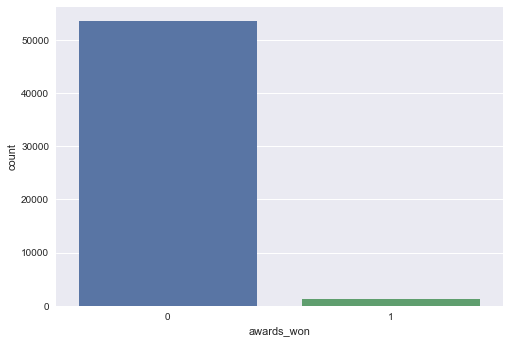

In [315]:
print(df['awards_won'].value_counts())
sns.countplot(df['awards_won'])

0    35517
1    19291
Name: KPIs_met, dtype: int64


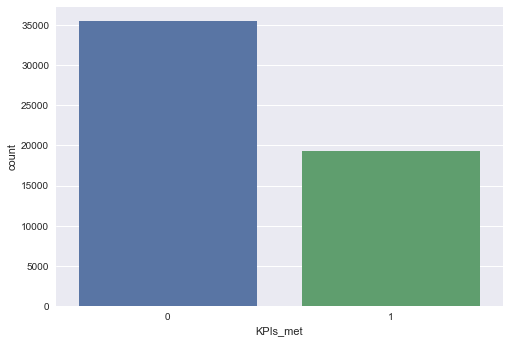

In [316]:
print(df['KPIs_met'].value_counts())
sns.countplot(df['KPIs_met'])

0    4109
1     559
Name: awards_won, dtype: int64


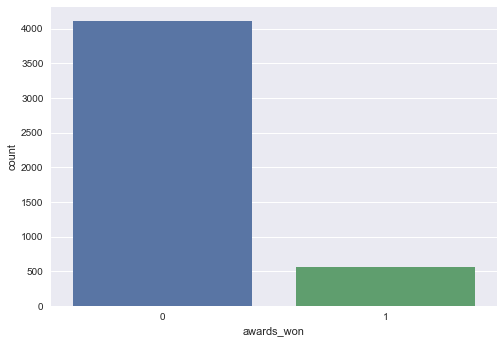

In [317]:
#No. of promoted people won award
print(df[df.is_promoted == 1].awards_won.value_counts())
sns.countplot(df[df.is_promoted == 1].awards_won)

1    3262
0    1406
Name: KPIs_met, dtype: int64


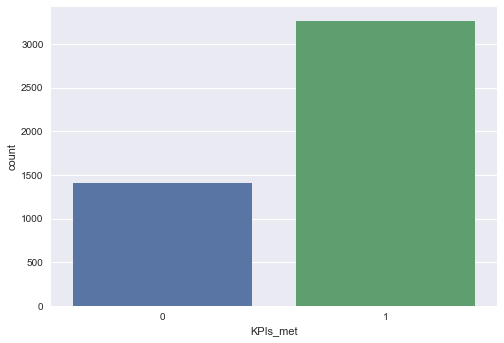

In [318]:
#No. of promoted people who has Key performance indicators
print(df[df.is_promoted == 1].KPIs_met.value_counts())
sns.countplot(df[df.is_promoted == 1].KPIs_met)

0    509
1    320
Name: is_promoted, dtype: int64


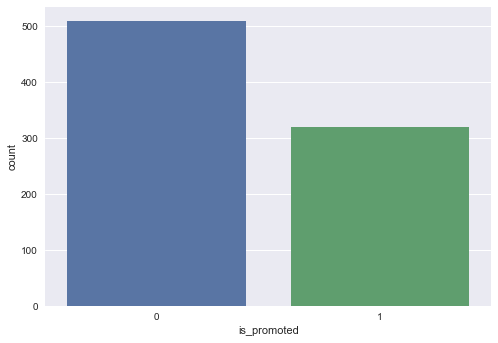

In [319]:
#No. of promoted people has both award amd KPI's
print(df[(df.KPIs_met == 1) & (df.awards_won == 1)].is_promoted.value_counts())
sns.countplot(df[(df.KPIs_met == 1) & (df.awards_won == 1)].is_promoted)

In [320]:
df.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

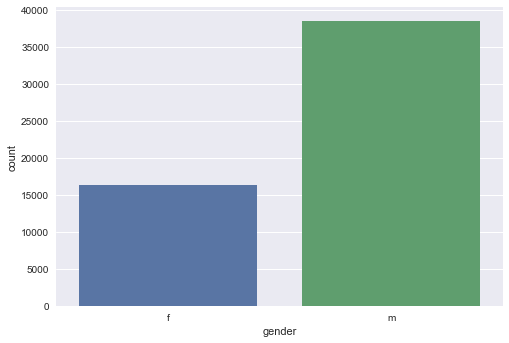

In [321]:
sns.countplot(df['gender'])

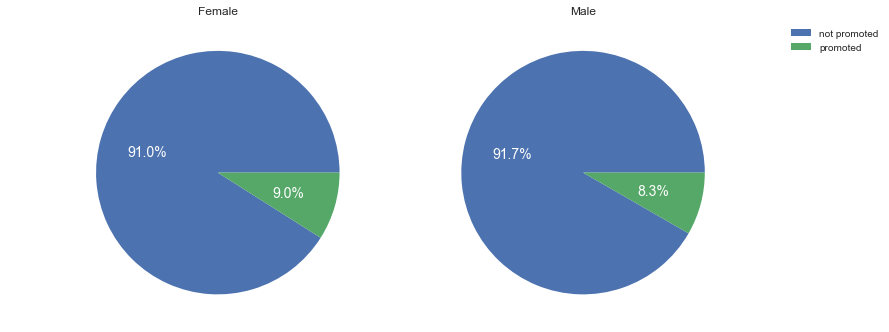

In [322]:
plt.style.use('seaborn')
plt.subplots(figsize=(12,8))
plt.subplot(1,2,1)
plt.pie(
    x=df[df.gender=='f'].is_promoted.value_counts(),
    labels=['not promoted','promoted'],
    autopct="%1.1f%%",
    textprops=dict(color='w',fontsize=14),
)
plt.title("Female")
plt.subplot(1,2,2)
plt.pie(
    x=df[df.gender=='m'].is_promoted.value_counts(),
    labels=['not promoted','promoted'],
     autopct="%1.1f%%",
    textprops=dict(color='w',fontsize=14),
)
plt.title("Male")
plt.legend(['not promoted','promoted'],loc='upper right', bbox_to_anchor=(1, 0.5, 0.5, 0.5))

In [323]:
#Lets divide employees into categories according to experience
df['category'] = pd.cut(
    df.length_of_service,
    bins=[0,2,7,10,37],
    labels=['New','Established','Experienced','Veteran']
)
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,category
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,Experienced
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,Established
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,Established
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,Experienced
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,New


In [324]:
service = df.pivot_table(values='is_promoted',index='category')
service

,is_promoted
category,
New,0.086546
Established,0.084940
Experienced,0.091110
Veteran,0.075943


Text(0.5, 0, 'category of employee')

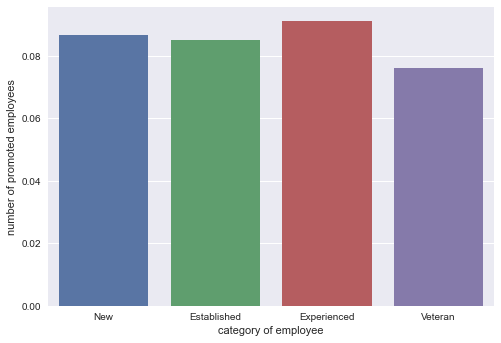

In [325]:
sns.barplot(
    x=service.index,
    y=service.is_promoted
)
plt.ylabel('number of promoted employees')
plt.xlabel('category of employee')

In [326]:
# Now divide employees according to age 

df['age_label'] = pd.cut(df.age,bins=[0,25,40,50,100],labels=['Young','Middle','Senior','Elder'])
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,category,age_label
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,Experienced,Middle
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,Established,Middle
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,Established,Middle
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,Experienced,Middle
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,New,Senior


In [327]:
ages = df.pivot_table(values='is_promoted',index='age_label')
ages

,is_promoted
age_label,
Young,0.066357
Middle,0.090173
Senior,0.072727
Elder,0.066971


Text(0.5, 0, 'age category')

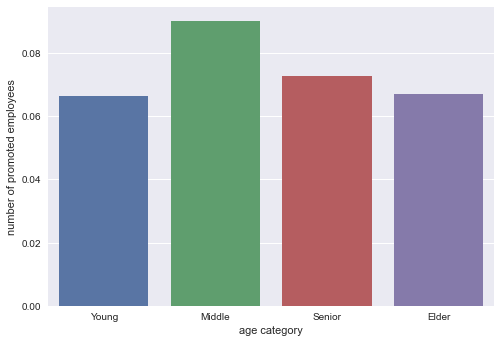

In [328]:
sns.barplot(
    x=ages.index,
    y=ages.is_promoted
)
plt.ylabel('number of promoted employees')
plt.xlabel('age category')

In [329]:
new_emp = df[df.category == 'New']

new_age = new_emp.pivot_table(values='is_promoted',index='age_label')
new_age

,is_promoted
age_label,
Young,0.066873
Middle,0.093564
Senior,0.084112
Elder,0.000000


Text(0.5, 0, 'age category')

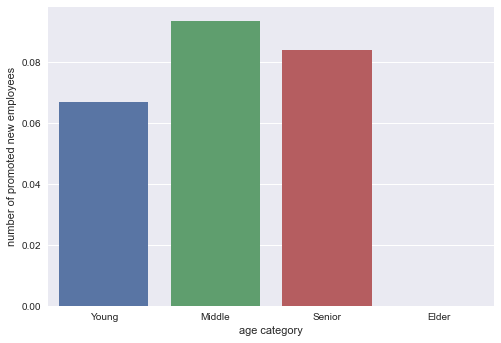

In [330]:
sns.barplot(
    x=new_age.index,
    y=new_age.is_promoted
)
plt.ylabel('number of promoted new employees')
plt.xlabel('age category')

In [331]:
ratings = df.pivot_table(values='is_promoted',index='previous_year_rating')
ratings

,is_promoted
previous_year_rating,
1.0,0.014141
2.0,0.042840
3.0,0.074488
4.0,0.079376
5.0,0.163615


Text(0.5, 0, 'ratings')

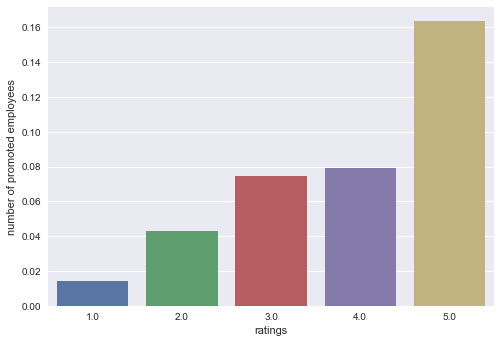

In [332]:
sns.barplot(
    x=ratings.index,
    y=ratings.is_promoted
)
plt.ylabel('number of promoted employees')
plt.xlabel('ratings')

In [333]:
df.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004209,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004209,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230
length_of_service,0.001274,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met,-0.002501,-0.045576,-0.025592,0.337367,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won,0.008420,-0.007628,-0.008169,0.026587,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.071926,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.153230,-0.010670,0.221582,0.195871,0.181147,1.000000


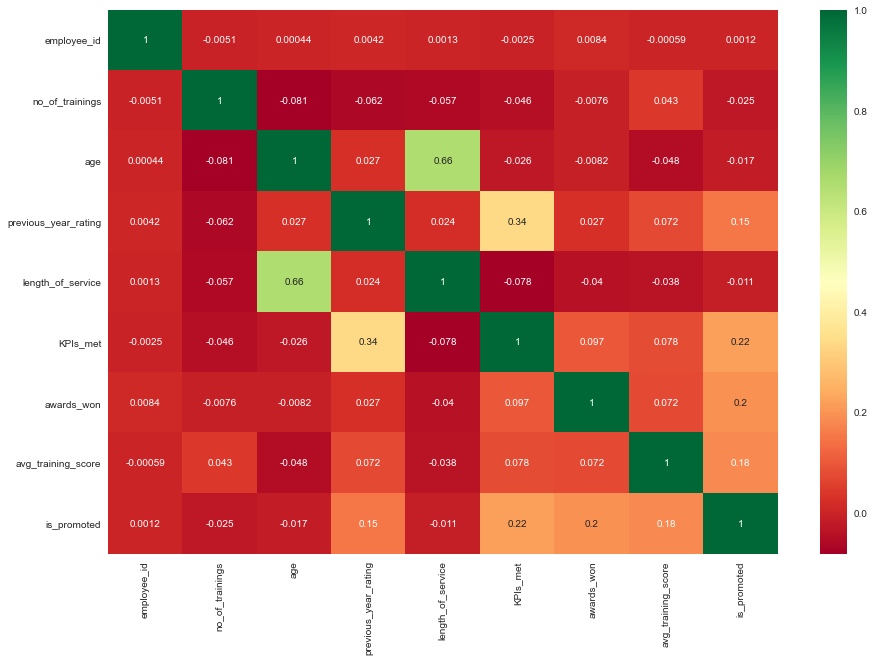

In [334]:
corrmat = df.corr()
top_feature = corrmat.index
plt.figure(figsize=(15, 10))

hm = sns.heatmap(df[top_feature].corr(), annot=True, cmap="RdYlGn")

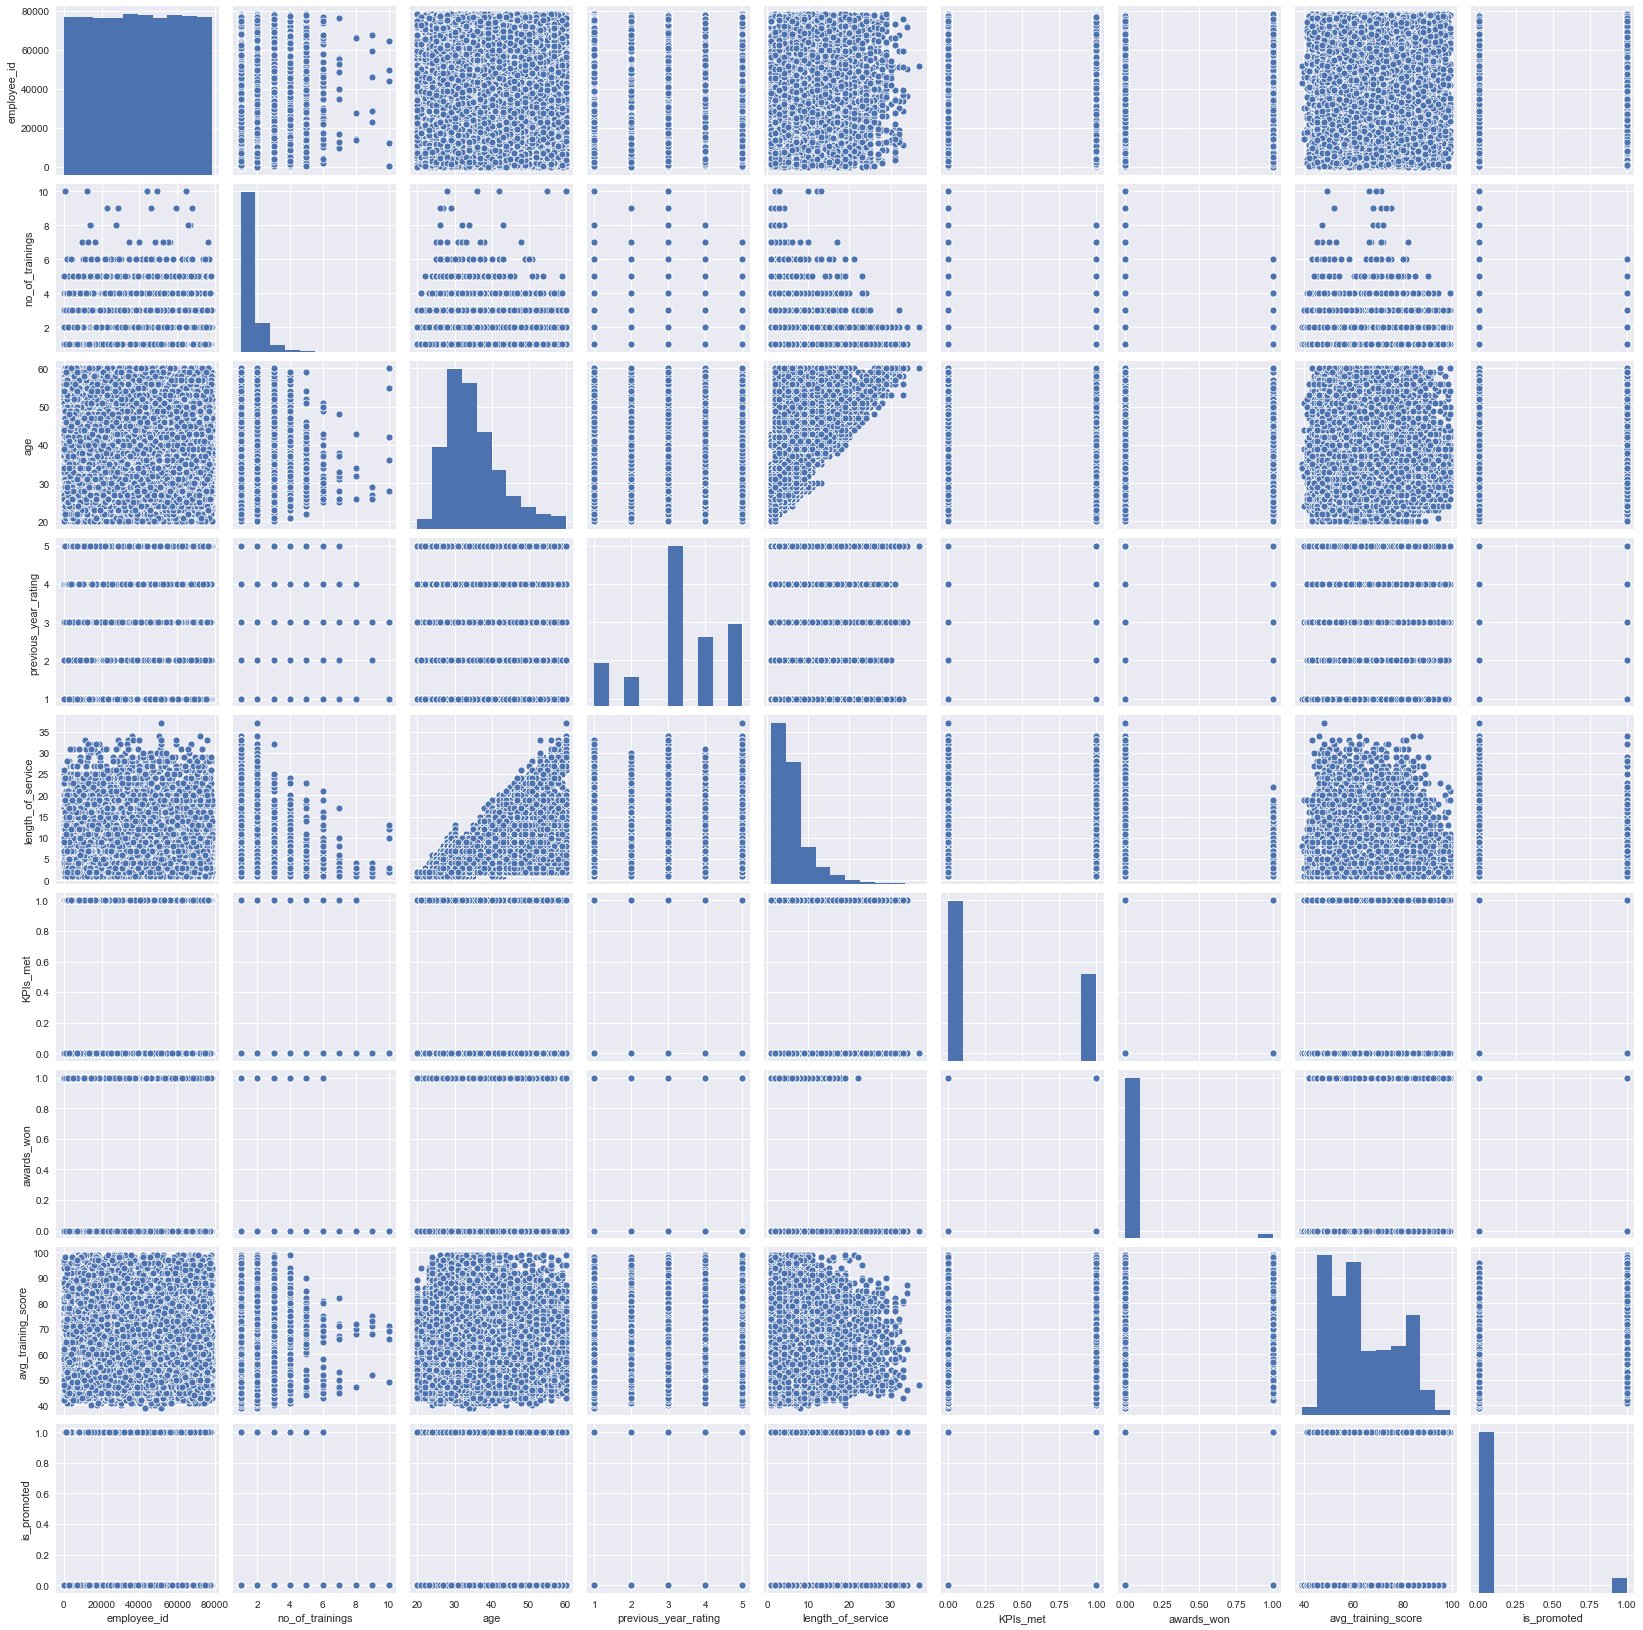

In [335]:
sns.pairplot(df)

## Training & Testing dataset

In [336]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [337]:
rm_cols = [
    'employee_id',
    'department',
    'region',
    'education',
    'gender',
    'recruitment_channel',
    'age',
    'length_of_service'
]

df.drop(rm_cols,axis=1,inplace=True)
df.head(5)

,no_of_trainings,previous_year_rating,KPIs_met,awards_won,avg_training_score,is_promoted,category,age_label
0,1,5.0,1,0,49,0,Experienced,Middle
1,1,5.0,0,0,60,0,Established,Middle
2,1,3.0,0,0,50,0,Established,Middle
3,2,1.0,0,0,50,0,Experienced,Middle
4,1,3.0,0,0,73,0,New,Senior


In [338]:
X = df.drop('is_promoted',axis=1)
y = df.is_promoted

cols = X.columns

print(X.shape)
print(y.value_counts())

(54808, 7)
0    50140
1     4668
Name: is_promoted, dtype: int64


In [339]:
X = X.values
y = y.values

In [340]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [341]:
X

array([[1, 5.0, 1, ..., 49, 'Experienced', 'Middle'],
       [1, 5.0, 0, ..., 60, 'Established', 'Middle'],
       [1, 3.0, 0, ..., 50, 'Established', 'Middle'],
       ...,
       [1, 5.0, 1, ..., 79, 'Established', 'Middle'],
       [1, 1.0, 0, ..., 45, 'New', 'Middle'],
       [1, 1.0, 0, ..., 49, 'Established', 'Middle']], dtype=object)

In [342]:
df['category'].value_counts()

Established    29986
New            11231
Experienced     7705
Veteran         5886
Name: category, dtype: int64

In [343]:
lb = LabelEncoder()

lb.fit(['Established','New', 'Experienced', 'Veteran'])
X[:,5] = lb.transform(X[:,5])
X[0:5]

array([[1, 5.0, 1, 0, 49, 1, 'Middle'],
       [1, 5.0, 0, 0, 60, 0, 'Middle'],
       [1, 3.0, 0, 0, 50, 0, 'Middle'],
       [2, 1.0, 0, 0, 50, 1, 'Middle'],
       [1, 3.0, 0, 0, 73, 2, 'Senior']], dtype=object)

In [344]:
df['age_label'].value_counts()

Middle    41132
Senior     7810
Young      3014
Elder      2852
Name: age_label, dtype: int64

In [345]:
lb.fit(['Middle','Senior', 'Young', 'Elder'])
X[:,6] = lb.transform(X[:,6])
X[0:5]

array([[1, 5.0, 1, 0, 49, 1, 1],
       [1, 5.0, 0, 0, 60, 0, 1],
       [1, 3.0, 0, 0, 50, 0, 1],
       [2, 1.0, 0, 0, 50, 1, 1],
       [1, 3.0, 0, 0, 73, 2, 2]], dtype=object)

In [346]:
X.astype('int32')

array([[ 1,  5,  1, ..., 49,  1,  1],
       [ 1,  5,  0, ..., 60,  0,  1],
       [ 1,  3,  0, ..., 50,  0,  1],
       ...,
       [ 1,  5,  1, ..., 79,  0,  1],
       [ 1,  1,  0, ..., 45,  2,  1],
       [ 1,  1,  0, ..., 49,  0,  1]])

In [347]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [348]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38365, 7)
(16443, 7)
(38365,)
(16443,)


## Modeling and evaluation

In [349]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import accuracy_score

### KNN 

In [350]:
j=[]
f=[]
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pre = knn.predict(X_test)
    j.append(jaccard_score(y_pre, y_test, average='micro'))
    f.append(f1_score(y_pre, y_test, average='micro'))

The highest the jaccard score - the better the performance
The highest accuracy ( 0.86 ) we got at k=  16


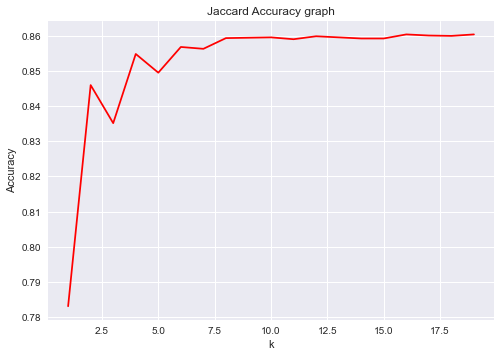

In [351]:
xx = np.arange(1,20,1)
plt.plot(xx, j, 'r')
plt.title('Jaccard Accuracy graph')
plt.xlabel('k')
plt.ylabel('Accuracy')
print("The highest the jaccard score - the better the performance")
print("The highest accuracy (",round(max(j), 3),") we got at k= ", (j.index(max(j)))+1)

The Highest the f1 score - the better the performance
The Highest accuracy ( 0.925 ) we got at k=  16


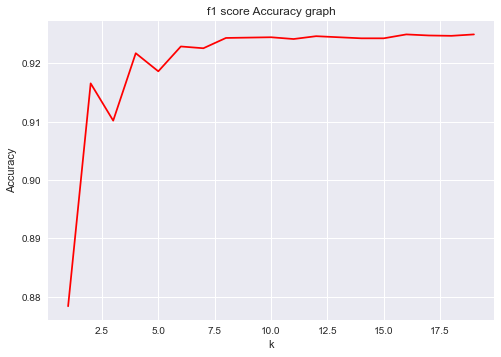

In [352]:
plt.plot(xx, f, 'r')
plt.title('f1 score Accuracy graph')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show

print("The Highest the f1 score - the better the performance")
print("The Highest accuracy (",'%.3f'%max(f),") we got at k= ", (f.index(max(f)))+1)

In [353]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
y_pre = knn.predict(X_test)

In [354]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     16263
           1       0.12      0.94      0.22       180

    accuracy                           0.92     16443
   macro avg       0.56      0.93      0.59     16443
weighted avg       0.99      0.92      0.95     16443

The f1 score of this model is:  0.925


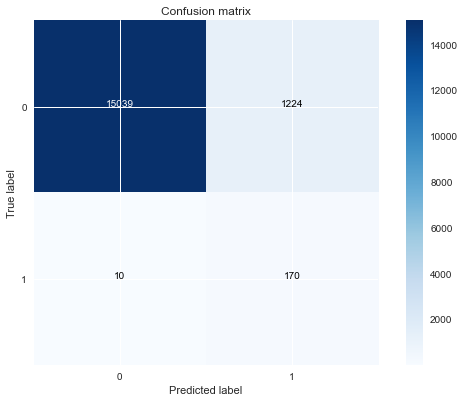

In [355]:
cm_knn = confusion_matrix(y_pre, y_test)
cr_knn = classification_report(y_pre, y_test)

print(cr_knn)
f1_knn = f1_score(y_pre, y_test, average='micro')
print("The f1 score of this model is: ", round(f1_knn, 3))

plt.figure()
plot_confusion_matrix(cm_knn, classes=[0, 1],normalize= False,  title='Confusion matrix')

In [356]:
A_knn = accuracy_score(y_pre, y_test)
print("KNN's Accuracy: ", round(A_knn, 3))

KNN's Accuracy:  0.925


### Logistic Regression 

In [357]:
emp_log = LogisticRegression(C=0.01, solver='newton-cg')
emp_log.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='newton-cg')

In [358]:
yLog_pre = emp_log.predict(X_test)
yLog_pre[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [359]:
j_log = jaccard_score(yLog_pre, y_test, average='micro')
print("The jaccard similarity score of this model is: ", j_log)

The jaccard similarity score of this model is:  0.8466981132075472


              precision    recall  f1-score   support

           0       1.00      0.92      0.96     16376
           1       0.03      0.72      0.07        67

    accuracy                           0.92     16443
   macro avg       0.52      0.82      0.51     16443
weighted avg       0.99      0.92      0.95     16443

The f1 score of this model is:  0.917


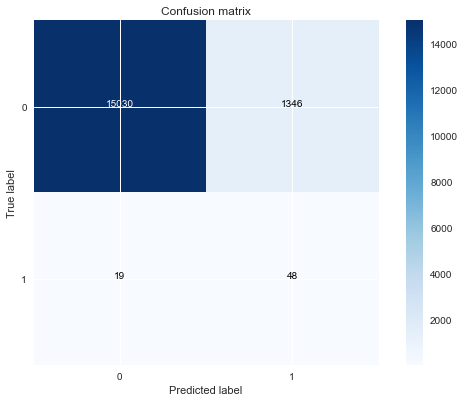

In [360]:
cm_log = confusion_matrix(yLog_pre, y_test)
cr_log = classification_report(yLog_pre, y_test, zero_division=0)

print(cr_log)
f1_log = f1_score(yLog_pre, y_test, average='micro')
print("The f1 score of this model is: ", round(f1_log,3))

plt.figure()
plot_confusion_matrix(cm_log, classes=[0, 1],normalize= False,  title='Confusion matrix')

In [361]:
A_log = round(accuracy_score(yLog_pre, y_test), 3)
print("Logistic Regression's Accuracy: ", A_log)

Logistic Regression's Accuracy:  0.917


### GridSearchCV

In [362]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'saga']

c_values = [100, 10, 1.0, 0.1, 0.01]

In [363]:
grid = dict(solver=solvers,C=c_values)

grid_search = GridSearchCV(estimator=emp_log, param_grid=grid, n_jobs=-1, scoring='accuracy')
grid_result = grid_search.fit(X, y)

In [364]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.916873 using {'C': 0.01, 'solver': 'newton-cg'}


## Decision Tree

In [365]:
emp_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
emp_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [366]:
yTre_pre = emp_tree.predict(X_test)
yTre_pre[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [367]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [368]:
df.columns

Index(['no_of_trainings', 'previous_year_rating', 'KPIs_met', 'awards_won',
       'avg_training_score', 'is_promoted', 'category', 'age_label'],
      dtype='object')

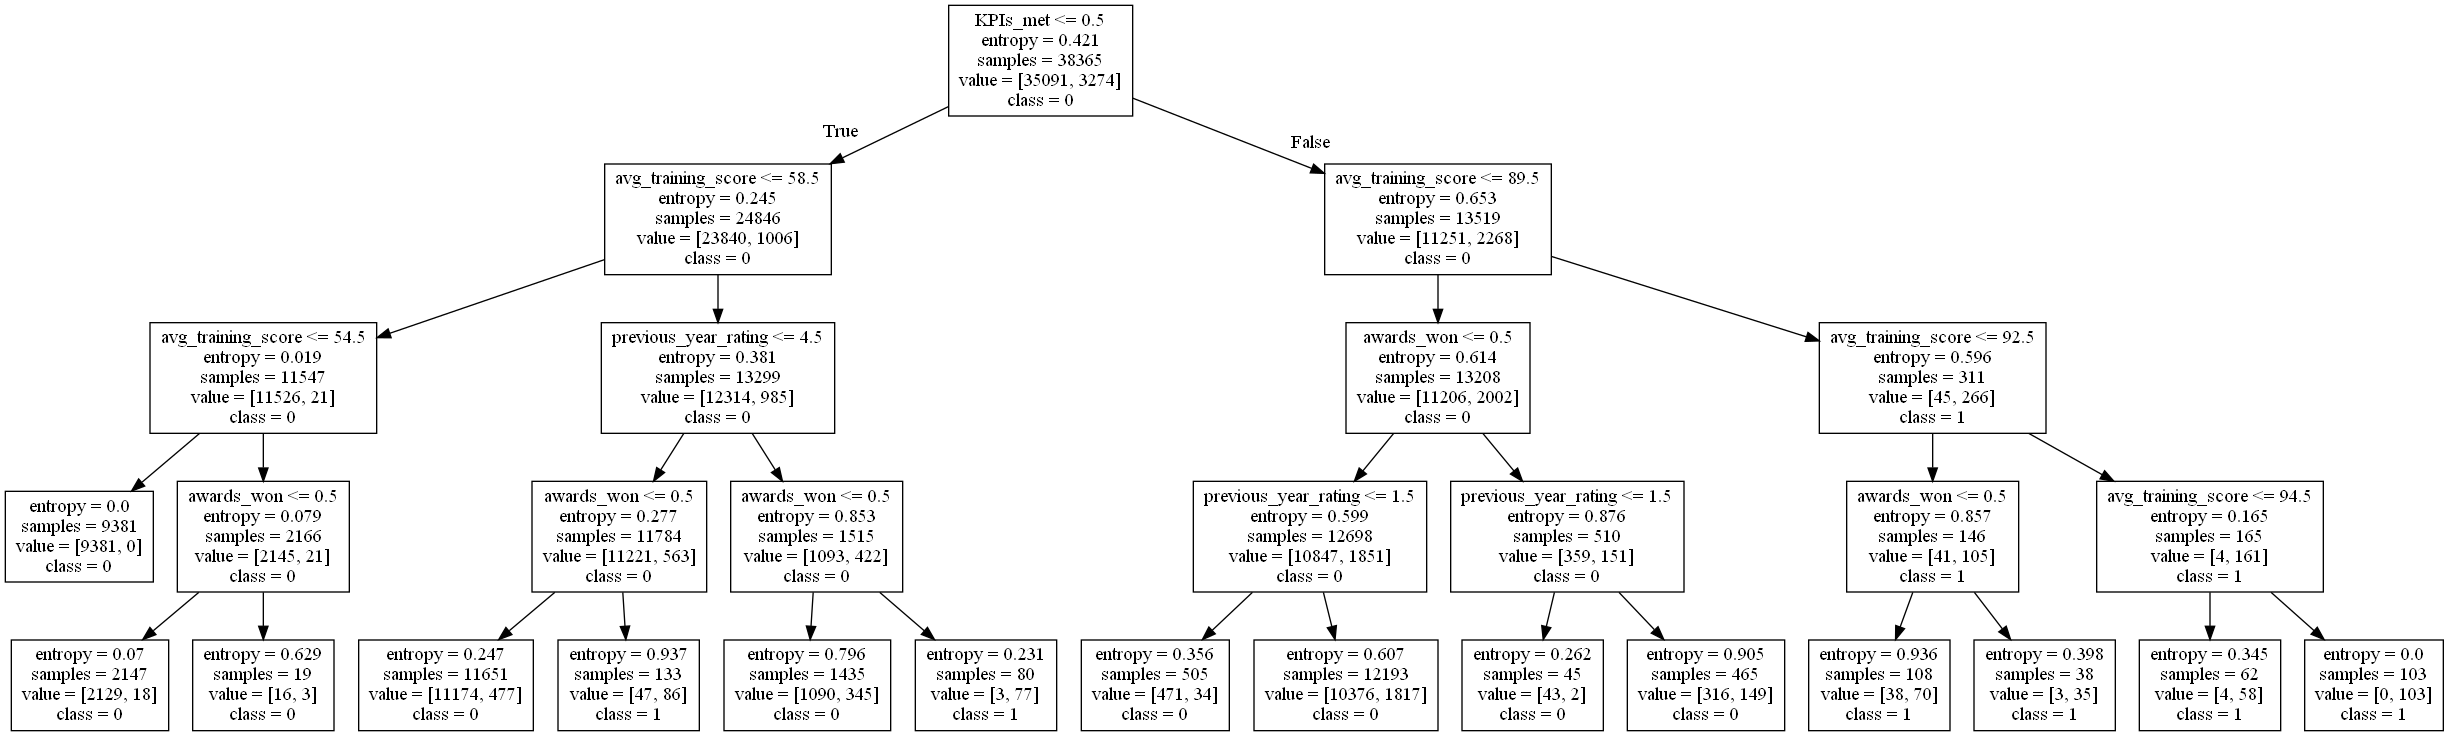

In [369]:
dot_data = tree.export_graphviz(emp_tree, out_file=None, 
                                feature_names=['no_of_trainings', 'previous_year_rating', 'KPIs_met', 'awards_won',
                                               'avg_training_score', 'category', 'age_label'],  
                                class_names=['0', '1'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [370]:
j_tree = jaccard_score(yTre_pre, y_test, average='micro')
print("The jaccard similarity score of this model is: ", round(j_tree, 3))

The jaccard similarity score of this model is:  0.858


              precision    recall  f1-score   support

           0       1.00      0.93      0.96     16201
           1       0.14      0.78      0.23       242

    accuracy                           0.92     16443
   macro avg       0.57      0.85      0.60     16443
weighted avg       0.98      0.92      0.95     16443

The f1 score of this model is:  0.923


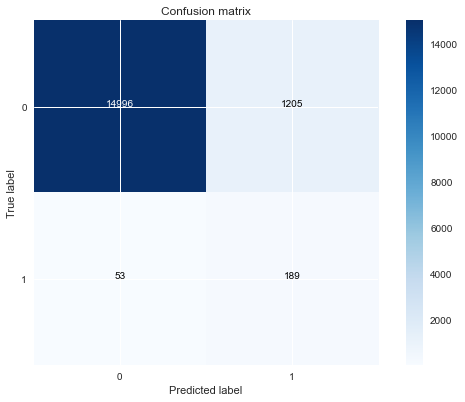

In [371]:
cm_tree = confusion_matrix(yTre_pre, y_test)
cr_tree = classification_report(yTre_pre, y_test)

print(cr_tree)
f1_tree = f1_score(yTre_pre, y_test, average='micro')
print("The f1 score of this model is: ", round(f1_tree,3))

plt.figure()
plot_confusion_matrix(cm_tree, classes=[0,1],normalize= False,  title='Confusion matrix')

In [372]:
A_tree = round(accuracy_score(yTre_pre, y_test), 3)
print("Decision's Accuracy: ", A_tree)

Decision's Accuracy:  0.923


In [373]:
data = [[round(A_knn, 3), round(max(j), 3) ,round(max(f), 3)], [A_tree, round(j_tree, 3), round(f1_tree, 3)], [A_log, round(j_log, 3), round(f1_log, 3)]]

table = pd.DataFrame(data, columns=['Accuracy', 'Jaccard score', 'F1 score'], index = ['KNN', 'Decision', 'Logistic'])
table

,Accuracy,Jaccard score,F1 score
KNN,0.925,0.860,0.925
Decision,0.923,0.858,0.923
Logistic,0.917,0.847,0.917


### The best classification algorithm sutaible for this dataset to predict the promotion is KNN